In [46]:
import wandb
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

entity = "ocrl_benchmark"
project = "ocrl-ari-mse"

models = {
    "SLATE": {"tags": ["slate"]},
    "Slot-Attention": {"tags": ["slotattention"]},
    "Slot-Attention-Large": {"tags": ["slotattention-large"]},
    "IODINE": {"tags": ["iodine"]},
}

tasks = {
    "Object Goal": {"tags": ["targetN4C4S3S1"]},
    "Object Interaction": {"tags": ["pushN3C4S1S1"]},
    "Object Comparison": {"tags":["oddoneoutN4C2S2S1oc"]},
    "Property Comparison": {"tags":["oddoneoutN4C2S2S1"]},
}

results = {}
api = wandb.Api(timeout=19)
for model_name in models.keys():
    model_tags = models[model_name]["tags"]
    if not model_name in results.keys():
        results[model_name] = {}
    for task_name in tasks.keys():
        task_tags = tasks[task_name]["tags"]
        if not task_name in results[model_name].keys():
            results[model_name][task_name] = {"ari": None, "mse": None}
        filters = [{"tags": tag} for tag in (model_tags+task_tags)]
        runs = api.runs(f"{entity}/{project}", filters={"$and": filters})
        if len(runs) > 1:
            print("WARNING: more than one run found for", model_name, task_name)
        else:
            results[model_name][task_name]["ari"] = runs[0].summary_metrics["ARI"]
            results[model_name][task_name]["mse"] = runs[0].summary_metrics["MSE"]

In [47]:
results

{'SLATE': {'Object Goal': {'ari': 0.9095687756398728,
   'mse': 13.303993027811996},
  'Object Interaction': {'ari': 0.9188563683493232, 'mse': 93.91878564365376},
  'Object Comparison': {'ari': 0.9116984608757236, 'mse': 10.185077316083085},
  'Property Comparison': {'ari': 0.9110346234472968,
   'mse': 9.276479524545396}},
 'Slot-Attention': {'Object Goal': {'ari': 0.928244404814297,
   'mse': 6.6094348377313095},
  'Object Interaction': {'ari': 0.9361966333147328, 'mse': 47.368396076531454},
  'Object Comparison': {'ari': 0.9294974244476402, 'mse': 5.033463219103341},
  'Property Comparison': {'ari': 0.9301074629335796,
   'mse': 4.732304552111763}},
 'Slot-Attention-Large': {'Object Goal': {'ari': 0.9134972577566284,
   'mse': 6.8578716147060215},
  'Object Interaction': {'ari': 0.9186504024424677, 'mse': 46.13281033061945},
  'Object Comparison': {'ari': 0.9144064617046724, 'mse': 6.053141662868828},
  'Property Comparison': {'ari': 0.9156423056032158, 'mse': 5.90389900999709}},
 

In [48]:
entity = "ocrl_benchmark"
project = "property-prediction"

api = wandb.Api(timeout=19)
for model_name in models.keys():
    model_tags = models[model_name]["tags"]
    for task_name in tasks.keys():
        task_tags = tasks[task_name]["tags"]
        filters = [{"tags": tag} for tag in (model_tags+task_tags)]
        runs = api.runs(f"{entity}/{project}", filters={"$and": filters})
        if len(runs) > 1:
            print("WARNING: more than one run found for", model_name, task_name)
        else:
            results[model_name][task_name]["R^2_xy"] = runs[0].summary_metrics["val/R^2_xy"]
            results[model_name][task_name]["acc_color"] = runs[0].summary_metrics["val/acc_color"]
            results[model_name][task_name]["acc_shape"] = runs[0].summary_metrics["val/acc_shape"]

In [49]:
results

{'SLATE': {'Object Goal': {'ari': 0.9095687756398728,
   'mse': 13.303993027811996,
   'R^2_xy': 0.9615781491937728,
   'acc_color': 0.9982028820644172,
   'acc_shape': 0.99738419360627},
  'Object Interaction': {'ari': 0.9188563683493232,
   'mse': 93.91878564365376,
   'R^2_xy': 0.8917390022414942,
   'acc_color': 0.990215665235306,
   'acc_shape': 0.9968250862325724},
  'Object Comparison': {'ari': 0.9116984608757236,
   'mse': 10.185077316083085,
   'R^2_xy': 0.9380622643251388,
   'acc_color': 0.9519968183276752,
   'acc_shape': 0.9829073592115896},
  'Property Comparison': {'ari': 0.9110346234472968,
   'mse': 9.276479524545396,
   'R^2_xy': 0.9575749919437372,
   'acc_color': 0.9817891492249484,
   'acc_shape': 0.944209278391573}},
 'Slot-Attention': {'Object Goal': {'ari': 0.928244404814297,
   'mse': 6.6094348377313095,
   'R^2_xy': 0.6425149109416877,
   'acc_color': 0.828813909436948,
   'acc_shape': 0.88815895779826},
  'Object Interaction': {'ari': 0.9361966333147328,
   '

In [50]:
entity = "ocrl_benchmark"
project = "agent-learning"

api = wandb.Api(timeout=19)
for model_name in models.keys():
    model_tags = models[model_name]["tags"]
    for task_name in tasks.keys():
        task_tags = tasks[task_name]["tags"]
        filters = [{"tags": tag} for tag in (model_tags+task_tags+["toplot"])]
        if model_name == "IODINE" and (task_name == "Object Interaction" or task_name == "Object Comparison"):
            runs = api.runs(f"jaesikyoon/ocrl-rl", filters={"$and": filters})
        else:
            runs = api.runs(f"{entity}/{project}", filters={"$and": filters})
        
        global_steps = []
        success_rates = []
        for run in runs:
            print(run)
            history = run.scan_history(["global_step","eval/success_rate"])
            _global_step = []
            _success_rate = []
            for row in history:
                _global_step.append(row["global_step"])
                _success_rate.append(row["eval/success_rate"])
            global_steps.append(_global_step)
            success_rates.append(_success_rate)
        if len(global_steps) == 0:  # no logs
            continue
        step = 2000000 // 4000
        # success rates
        for rate_idx in range(len(success_rates)):
            success_rates[rate_idx] = success_rates[rate_idx][:step] # to collect the performance at 2M steps
            if len(success_rates[rate_idx]) < 500:
                success_rates[rate_idx] += [success_rates[rate_idx][-1]] * (500-len(success_rates[rate_idx]))
        sr_steps = global_steps[-1][:step]
        success_rates = np.array(success_rates)
        sr_mean = np.mean(success_rates[:,-10:])
        results[model_name][task_name]["rl"] = sr_mean

<Run ocrl_benchmark/ocrl-exp-res/1i5l2rsc (finished)>
<Run ocrl_benchmark/ocrl-exp-res/381f2oav (finished)>
<Run ocrl_benchmark/ocrl-exp-res/2jtqf9nl (finished)>
<Run ocrl_benchmark/ocrl-exp-res/2jdndm72 (finished)>
<Run ocrl_benchmark/ocrl-exp-res/20mgxoio (finished)>
<Run ocrl_benchmark/ocrl-exp-res/17j7uj00 (finished)>
<Run ocrl_benchmark/ocrl-exp-res/3lkk3c1h (finished)>
<Run ocrl_benchmark/ocrl-exp-res/3h5nw8r8 (finished)>
<Run ocrl_benchmark/ocrl-exp-res/qg5gsaxi (finished)>
<Run ocrl_benchmark/ocrl-exp-res/270y8iki (finished)>
<Run ocrl_benchmark/ocrl-exp-res/11heyik8 (finished)>
<Run ocrl_benchmark/ocrl-exp-res/5fhwbfv9 (finished)>
<Run ocrl_benchmark/ocrl-exp-res/24n0rdg7 (finished)>
<Run ocrl_benchmark/ocrl-exp-res/1pc4fcjk (finished)>
<Run ocrl_benchmark/ocrl-exp-res/3p408ujb (finished)>
<Run ocrl_benchmark/ocrl-exp-res/1eap4o97 (finished)>
<Run ocrl_benchmark/ocrl-exp-res/3uv1ss0r (finished)>
<Run ocrl_benchmark/ocrl-exp-res/3v4hfph9 (finished)>
<Run ocrl_benchmark/ocrl-exp

In [51]:
results
import json
with open("results/ari_mse_pp_correlation.json", "w") as f:
    json.dump(results, f)

{'SLATE': {'Object Goal': {'ari': 0.9095687756398728,
   'mse': 13.303993027811996,
   'R^2_xy': 0.9615781491937728,
   'acc_color': 0.9982028820644172,
   'acc_shape': 0.99738419360627,
   'rl': 0.9853333453337352},
  'Object Interaction': {'ari': 0.9188563683493232,
   'mse': 93.91878564365376,
   'R^2_xy': 0.8917390022414942,
   'acc_color': 0.990215665235306,
   'acc_shape': 0.9968250862325724,
   'rl': 0.7873333315054576},
  'Object Comparison': {'ari': 0.9116984608757236,
   'mse': 10.185077316083085,
   'R^2_xy': 0.9380622643251388,
   'acc_color': 0.9519968183276752,
   'acc_shape': 0.9829073592115896,
   'rl': 0.9790000100930532},
  'Property Comparison': {'ari': 0.9110346234472968,
   'mse': 9.276479524545396,
   'R^2_xy': 0.9575749919437372,
   'acc_color': 0.9817891492249484,
   'acc_shape': 0.944209278391573,
   'rl': 0.9800000091393789}},
 'Slot-Attention': {'Object Goal': {'ari': 0.928244404814297,
   'mse': 6.6094348377313095,
   'R^2_xy': 0.6425149109416877,
   'acc_co

Object Goal
         ari       mse    R^2_xy  acc_color  acc_shape
rl -0.107288 -0.005313 -0.588284   0.896963  -0.445687
Object Interaction
         ari       mse    R^2_xy  acc_color  acc_shape
rl -0.536016 -0.802782  0.625088   0.587928   0.990075
Object Comparison
        ari       mse    R^2_xy  acc_color  acc_shape
rl -0.10999  0.214959 -0.957597  -0.999454  -0.982734
Property Comparison
        ari       mse    R^2_xy  acc_color  acc_shape
rl -0.24205  0.356965 -0.401278  -0.409294  -0.379375


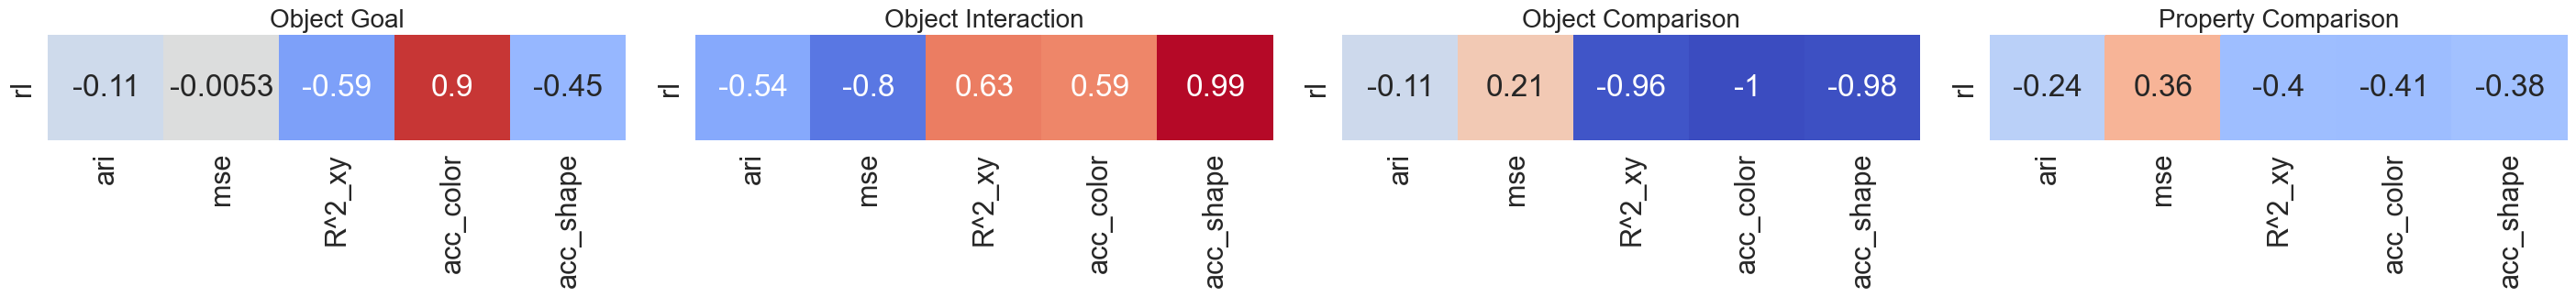

In [52]:
shape = (1, len(tasks))
top = 0.17
hspace = 0.1
bottom = 0.19
height = 1 - top - bottom
left = 0.022
wspace = 0.03
right = 0.048
widths = [0.25, 0.25, 0.25, 0.25]
recs = np.zeros(len(tasks), dtype=object)
for i in range(recs.shape[0]):
    recs[i] = [
        left + i * wspace + np.sum(widths[:i]),  # left
        bottom,  # bottom
        widths[i],
        height,
    ]
plt.figure(figsize=(6.3 * recs.shape[0], 1.8))
import seaborn as sns
sns.set(font_scale=2)
measurements = ["ari", "mse", "R^2_xy", "acc_color", "acc_shape", "rl"]
for t_idx, task in enumerate(tasks.keys()):
    ax = plt.axes(recs[t_idx])
    task_data = []
    for model_name in models.keys():
        task_data.append([results[model_name][task][_measurement] for _measurement in measurements])
    df = pd.DataFrame(task_data, columns=measurements)
    corr = df.corr()
    res_corr = np.zeros((1, len(measurements)-1))
    _corr = corr["rl"]
    for j in range(len(measurements)-1):
        res_corr[0,j] = _corr[measurements[j]]
    corr = pd.DataFrame(res_corr, columns=measurements[:-1])
    corr = corr.set_index(pd.Series(["rl"]))
    corr["mse"] = -1 * corr["mse"]
    print(task)
    print(corr)
    sns.heatmap(corr, annot=True, fmt='.2g',cmap= 'coolwarm', cbar=False, ax=ax, vmin=-1, vmax=1)
    ax.set_title(task, fontsize=20)

In [53]:
for measurement in measurements[:-1]:
    print(measurement)
    for model_name in models.keys():
        print(model_name, [results[model_name][task_name][measurement] for task_name in ["Object Goal", "Object Interaction", "Object Comparison", "Property Comparison"]])

ari
SLATE [0.9095687756398728, 0.9188563683493232, 0.9116984608757236, 0.9110346234472968]
Slot-Attention [0.928244404814297, 0.9361966333147328, 0.9294974244476402, 0.9301074629335796]
Slot-Attention-Large [0.9134972577566284, 0.9186504024424677, 0.9144064617046724, 0.9156423056032158]
IODINE [0.9183037000066904, 0.926168975035946, 0.920287699390852, 0.9216321001559282]
mse
SLATE [13.303993027811996, 93.91878564365376, 10.185077316083085, 9.276479524545396]
Slot-Attention [6.6094348377313095, 47.368396076531454, 5.033463219103341, 4.732304552111763]
Slot-Attention-Large [6.8578716147060215, 46.13281033061945, 6.053141662868828, 5.90389900999709]
IODINE [8.982746837238153, 75.98419145578012, 8.167510648124134, 8.430759806221666]
R^2_xy
SLATE [0.9615781491937728, 0.8917390022414942, 0.9380622643251388, 0.9575749919437372]
Slot-Attention [0.6425149109416877, 0.8227723768343941, 0.9511568468218794, 1.0026257879817828]
Slot-Attention-Large [0.7745566573767616, 0.8773900239041057, 0.9315117